In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Wine Quality

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

wine_data = pd.read_csv(url, sep=';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
for i in wine_data.keys():
    print(f"{i} has {len(np.unique(wine_data[i]))} unique values")

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


C:\Users\drkum\DataspellProjects\deep_learning_pytorch\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


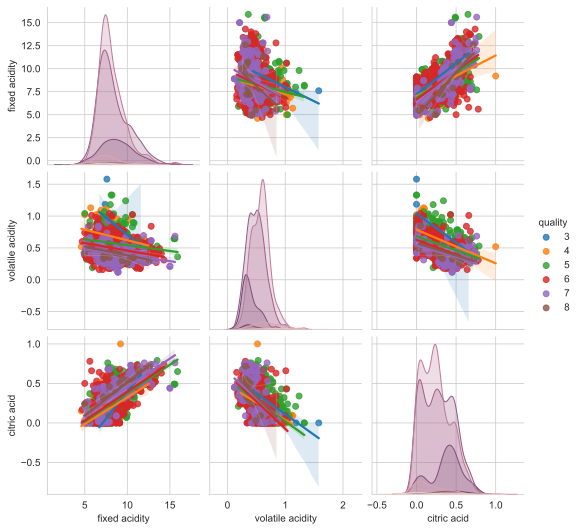

In [5]:
sns.pairplot(data=wine_data[["fixed acidity", "volatile acidity", "citric acid", "quality"]], kind="reg", hue="quality");

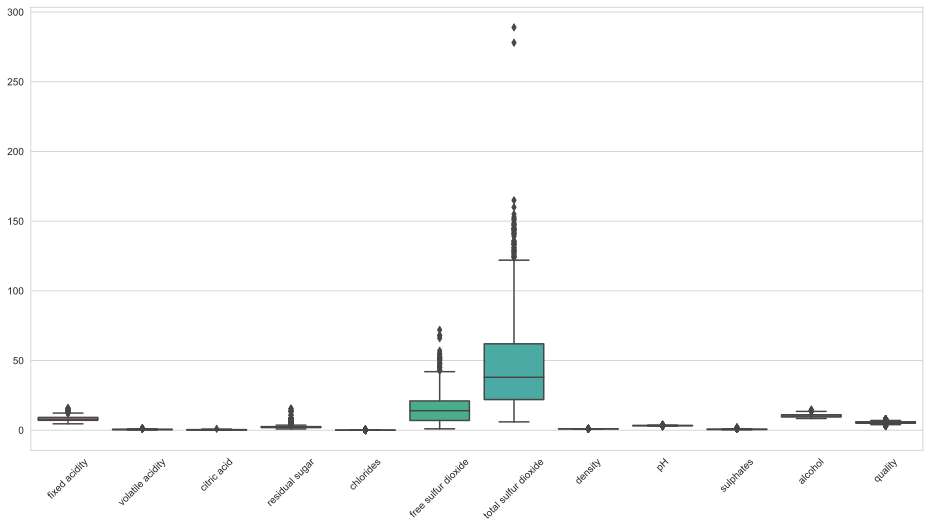

In [6]:
_, ax = plt.subplots(1, figsize=(16, 8))
wine_data_outliers = wine_data[wine_data['total sulfur dioxide']<200]
ax = sns.boxplot(data=wine_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

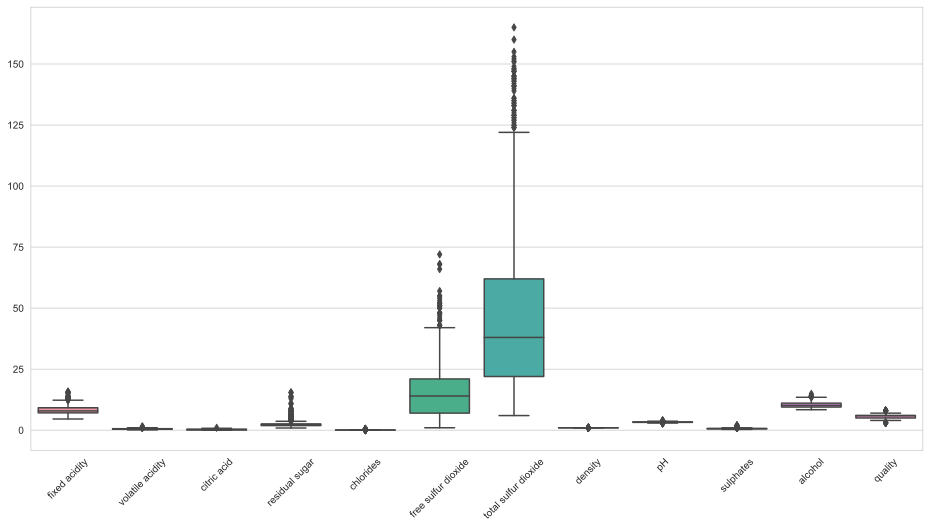

In [7]:
_, ax = plt.subplots(1, figsize=(16, 8))
ax = sns.boxplot(data=wine_data_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [8]:
cols_zscore = wine_data_outliers.keys()
cols_zscore = cols_zscore.drop("quality")

for col in cols_zscore:
    mean_val = np.mean(wine_data_outliers[col])
    std_dev = np.std(wine_data_outliers[col], ddof=1)
    wine_data_outliers[col] = (wine_data_outliers[col] - mean_val) / std_dev

wine_data_outliers.describe()

C:\Users\drkum\AppData\Local\Temp\ipykernel_17768\2230930915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_outliers[col] = (wine_data_outliers[col] - mean_val) / std_dev


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,1.779694e-17,1.156801e-16,1.779694e-17,-7.563699e-17,-1.512740e-16,-1.779694e-17,-7.118775e-17,-8.357442e-14,3.025479e-16,8.008622e-17,-5.872989e-16,5.634314
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.806630
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,-1.168783e+00,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,3.000000
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,-4.524372e-01,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,5.000000
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,-2.375335e-01,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,6.000000
75%,5.050372e-01,6.251419e-01,7.692848e-01,4.900487e-02,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,6.000000
max,4.350918e+00,5.876831e+00,3.753070e+00,9.289866e+00,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,8.000000


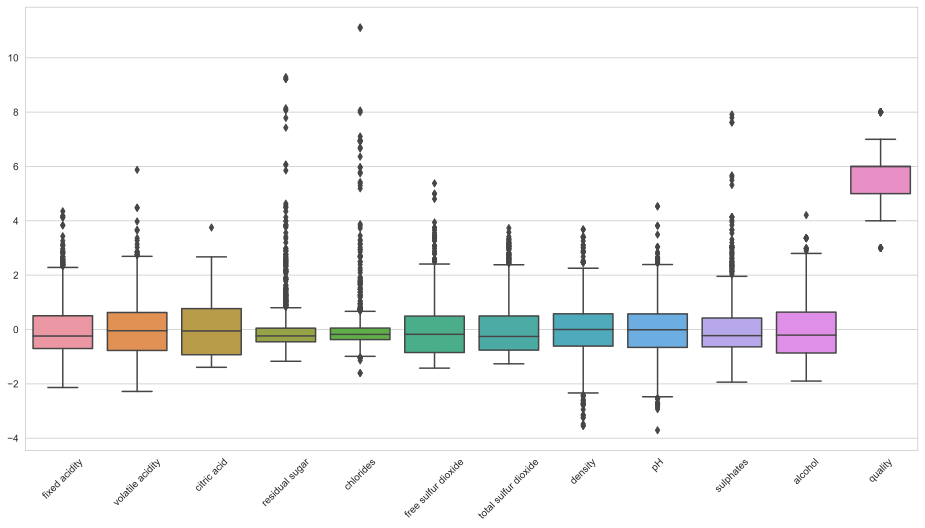

In [9]:
_, ax = plt.subplots(1, figsize=(16, 8))
ax = sns.boxplot(data=wine_data_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

C:\Users\drkum\AppData\Local\Temp\ipykernel_17768\264037836.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_outliers["boolQuantity"] = 0
C:\Users\drkum\AppData\Local\Temp\ipykernel_17768\264037836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_outliers["boolQuantity"][wine_data_outliers["quality"]>5] = 1


,quality,boolQuantity
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


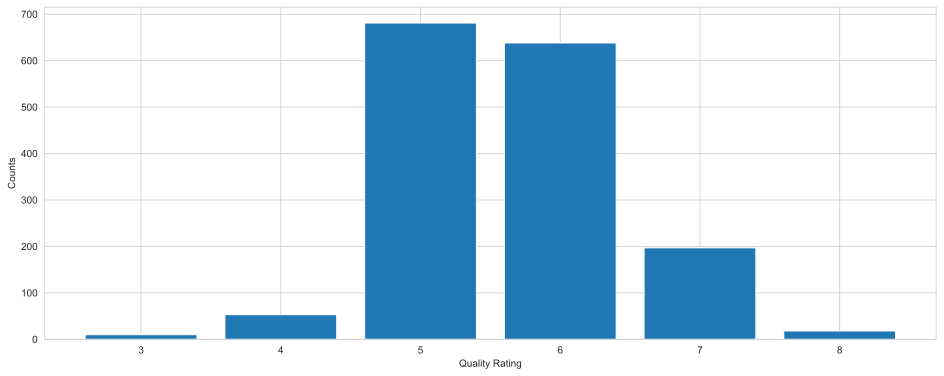

In [10]:
fig = plt.figure(figsize=(16, 6))

counts = wine_data_outliers['quality'].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel("Quality Rating")
plt.ylabel("Counts");

wine_data_outliers["boolQuantity"] = 0
wine_data_outliers["boolQuantity"][wine_data_outliers["quality"]>5] = 1

wine_data_outliers[["quality", "boolQuantity"]]

In [11]:
data_tensor = torch.tensor(data=wine_data_outliers[cols_zscore].values).float()
label_tensor = torch.tensor(data=wine_data_outliers["boolQuantity"].values).float()
label_tensor = label_tensor[:, None]

print(data_tensor.shape)
print(label_tensor.shape)

torch.Size([1597, 11])
torch.Size([1597, 1])


In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, label_tensor, test_size=0.1)

train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [13]:
for x, y in train_loader:
    print(x.shape, y.shape)
x, y = next(iter(test_loader))
print(x.shape, y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([160, 11]) torch.Size([160, 1])


In [14]:
def wineModel():
    ann_wine = nn.Sequential(nn.Linear(11, 16), nn.ReLU(), nn.Linear(16, 32), nn.ReLU(), nn.Linear(32, 1))
    
    loss_fun = nn.BCEWithLogitsLoss()
    
    optimizer = torch.optim.SGD(ann_wine.parameters(), lr=0.01)
    
    return ann_wine, loss_fun, optimizer

In [15]:
num_epochs = 1500

def trainModel(ann_wine, loss_fun, optimizer):
    
    train_acc = []
    test_acc = []
    losses = []
    
    for epoch in range(num_epochs):
        
        ann_wine.train()
        batch_acc = []
        batch_loss = []
        
        for x, y in train_loader:
            y_hat = ann_wine(x)
            
            loss = loss_fun(y_hat, y)
            batch_loss.append(loss.detach())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batch_acc.append(100*torch.mean(((ann_wine(x) > 0) == y).float()).item())
        
        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))
        
        ann_wine.eval()
        x, y = next(iter(test_loader))
        with torch.no_grad():
            test_acc.append(100*torch.mean(((ann_wine(x) > 0) == y).float()).item())
        
    return train_acc, test_acc , losses

In [16]:
ann_wine, loss_fun, optimizer = wineModel()
train_acc, test_acc, loss = trainModel(ann_wine, loss_fun, optimizer)

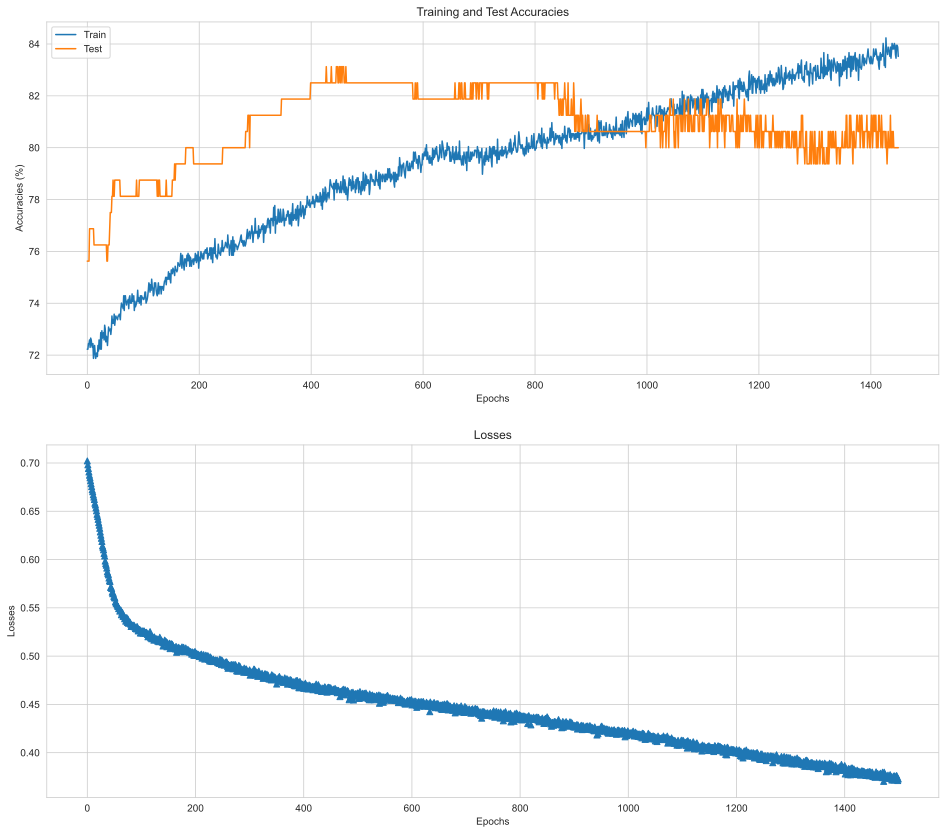

In [17]:
_, axis = plt.subplots(2, 1, figsize=(16, 14))
axis[0].plot(train_acc[50:], '-')
axis[0].plot(test_acc[50:], '-')
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Accuracies (%)")
axis[0].legend(["Train", "Test"])
axis[0].set_title("Training and Test Accuracies")

axis[1].plot(loss, '^-')
axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Losses")
axis[1].set_title("Losses");

In [18]:
def decideTrainBatch(batch_size):
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
    return train_loader

In [19]:
def wineModel():
    ann_wine = nn.Sequential(nn.Linear(11, 16), nn.ReLU(), nn.Linear(16, 32), nn.ReLU(), nn.Linear(32, 1))

    loss_fun = nn.BCEWithLogitsLoss()

    optimizer = torch.optim.SGD(ann_wine.parameters(), lr=0.01)

    return ann_wine, loss_fun, optimizer

In [20]:
num_epochs = 1500

def trainModel(train_loader):
    ann_wine, loss_fun, optimizer = wineModel()
    train_acc = []
    test_acc = []

    for epoch in range(num_epochs):
        ann_wine.train()
        batch_acc = []
        batch_loss = []

        for x, y in train_loader:
            y_hat = ann_wine(x)

            loss = loss_fun(y_hat, y)
            batch_loss.append(loss.detach())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_acc.append(100*torch.mean(((ann_wine(x) > 0) == y).float()).item())

        train_acc.append(np.mean(batch_acc))

        ann_wine.eval()
        x, y = next(iter(test_loader))
        with torch.no_grad():
            test_acc.append(100*torch.mean(((ann_wine(x) > 0) == y).float()).item())

    return train_acc, test_acc

In [21]:
import time
batchSize = 2**np.arange(1, 10, 2)

batch_train_acc = np.zeros((num_epochs, len(batchSize)))
batch_test_acc = np.zeros((num_epochs, len(batchSize)))
batch_time = np.zeros((len(batchSize), 1))

for batch in range(len(batchSize)):
    start = time.time()
    train_loader = decideTrainBatch(int(batchSize[batch]))
    train_acc, test_acc = trainModel(train_loader)
    batch_train_acc[:, batch] = train_acc
    batch_test_acc[:, batch] = test_acc
    end = time.time()
    batch_time[batch] = end - start

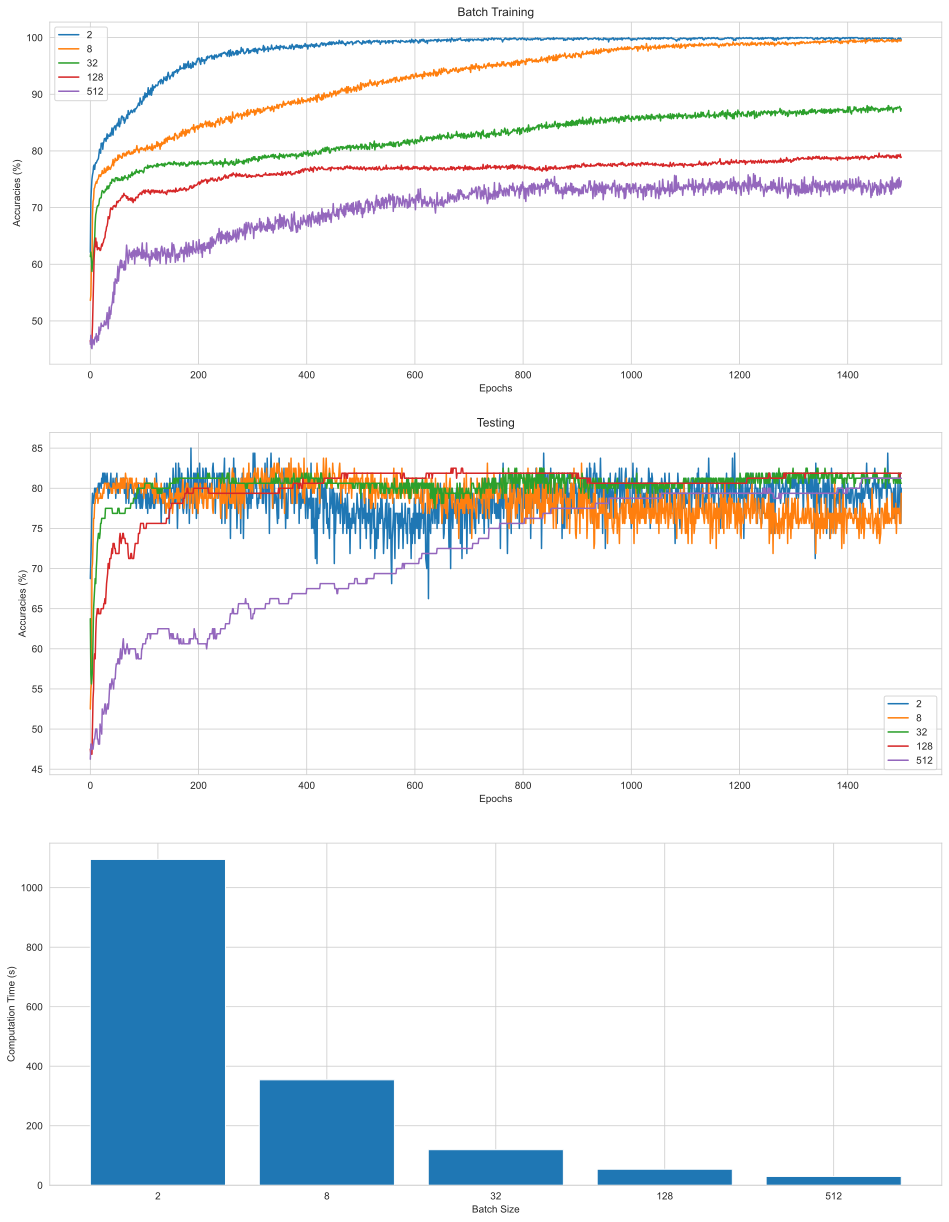

In [38]:
_, axis = plt.subplots(3, 1, figsize=(16, 21))
axis[0].plot(batch_train_acc)
axis[0].set_ylabel("Accuracies (%)")
axis[0].set_xlabel("Epochs")
axis[0].set_title("Batch Training")
axis[0].legend(batchSize)

axis[1].plot(batch_test_acc)
axis[1].set_ylabel("Accuracies (%)")
axis[1].set_xlabel("Epochs")
axis[1].set_title("Testing")
axis[1].legend(batchSize)

batch_time = batch_time.reshape(-1,)
axis[2].bar(range(len(batch_time)), batch_time, tick_label=batchSize)
axis[2].set_xlabel("Batch Size")
axis[2].set_ylabel("Computation Time (s)");